# 北京二手房房价分析与预测 

### 项目简介
本项目根据个人需求进行北京二手房信息的数据分析，通过数据分析观察住房特征规律，利用机器学习模型进行简单的预测。
### 数据源
通过爬虫爬取第三方房屋中间商网站（链家和安居客）获取数据源，仅供学习使用。 

### 目的
北京房价是最受关注的话题。因此，本项目以研究北京二手房房价为目的，对二手房房价进行数据分析。
- 统计北京各区域二手房房价情况
- 统计北京各区域二手房数量
- 统计西城区、东城区和海淀区各地方二手房房价
- 统计房价与房屋面积区段的房屋数量

### 技术和工具
本项目以Python语言编程完成数据分析。
 
- 数据分析：`pandas`，`numpy`，`matplolib`


## 1. 数据导入和清洗

### 导入链家数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 导入链家二手房数据 
lianjia_df = pd.read_csv('./lianjia.csv') 

# 删除没用的列 ['Id', 'Direction', 'Elevator', 'Renovation'],为了与安居客数据合并
drop = ['Id', 'Direction', 'Elevator', 'Renovation']
lianjia_df_clean = lianjia_df.drop(drop, axis=1)

# 重新摆放列位置 ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Price']
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Price']
lianjia_df_clean = pd.DataFrame(lianjia_df_clean, columns=columns)
print(lianjia_df_clean.head())

lianjia_total_num = lianjia_df_clean['Region'].count()
print(lianjia_total_num)

  Region District    Garden Layout  Floor  Year   Size   Price
0     东城      灯市口  锡拉胡同21号院   3室1厅      6  1988   75.0   780.0
1     东城       东单     东华门大街   2室1厅      6  1988   60.0   705.0
2     东城      崇文门     新世界中心   3室1厅     16  1996  210.0  1400.0
3     东城      崇文门    兴隆都市馨园   1室1厅      7  2004   39.0   420.0
4     东城      陶然亭    中海紫御公馆   2室2厅     19  2010   90.0   998.0
23677


In [2]:
# 导入安居客二手房数据
anjuke_df = pd.read_csv('./anjuke.csv')

anjuke_df['District'] = anjuke_df['Region'].str.extract(r'.+?-(.+?)-.+?', expand= False)
anjuke_df['Region'] = anjuke_df['Region'].str.extract(r'(.+?)-.+?-.+?', expand= False)
anjuke_df.head()
#清洗数据，重新摆放列位置
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Price']
anjuke_df = pd.DataFrame(anjuke_df, columns=columns)
print(anjuke_df.head())

anjuke_total_num = anjuke_df['Region'].count()
print(anjuke_total_num)

  Region District   Garden Layout  Floor  Year  Size  Price
0     通州      马驹桥     兴达公寓   2室2厅     25  2017    76  107.0
1     大兴      瀛海镇  中铁华侨城和园   4室2厅     13  2017   136  750.0
2     西城      阜成门    北营房小区   3室1厅      6  1988    66  600.0
3     丰台       方庄     首开璞瑅   3室2厅     22  2017   102  698.0
4     顺义       天竺     丽京花园   2室2厅      3  1999   153  613.0
3000


In [3]:
# 数据集合并将链家数据集与安居客数据集合并
# 增加一列：每平方的价格
df = pd.merge(lianjia_df_clean, anjuke_df, how='outer')
df
df['PriceMs'] = df['Price'] / df['Size']
df

# 对汇总数据再次清洗 (Null, 重复)
df.dropna(how='any')
df.drop_duplicates(keep='first', inplace=True)
# 一些别墅的房屋单价有异常，删选价格大于25万一平的
df = df.loc[df['PriceMs']<25]

total_num = anjuke_total_num + lianjia_total_num

df_num = df['Floor'].count()

drop_num = total_num - df_num

print(total_num)
print(df_num)
print(drop_num)

26677
24281
2396


## 2.数据可视化分析

### 北京各区域二手房房价均值对比 & 二手房数量对比

In [4]:
# 统计北京各区域二手房房价数量
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False)
print(df_house_count)
# 统计北京各区域二手房房价均值
df_house_mean = df.groupby('Region')['PriceMs'].mean().sort_values(ascending=False)
print(df_house_count)

Region
朝阳       3147
海淀       2885
昌平       2878
丰台       2865
西城       2115
大兴       2106
通州       1600
房山       1575
东城       1517
顺义       1343
石景山       877
门头沟       500
亦庄开发区     457
北京周边      243
密云         89
平谷         51
怀柔         30
延庆          3
Name: Price, dtype: int64
Region
朝阳       3147
海淀       2885
昌平       2878
丰台       2865
西城       2115
大兴       2106
通州       1600
房山       1575
东城       1517
顺义       1343
石景山       877
门头沟       500
亦庄开发区     457
北京周边      243
密云         89
平谷         51
怀柔         30
延庆          3
Name: Price, dtype: int64


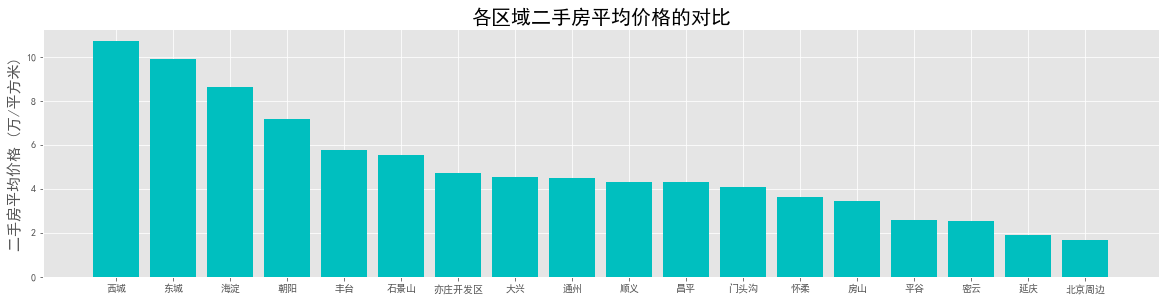

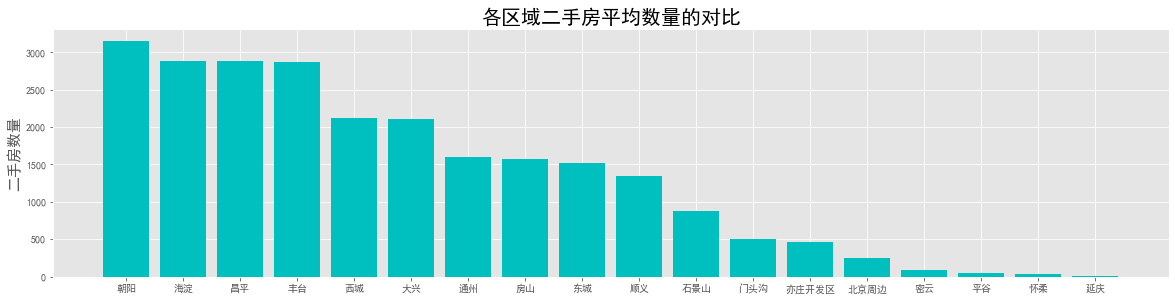

[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


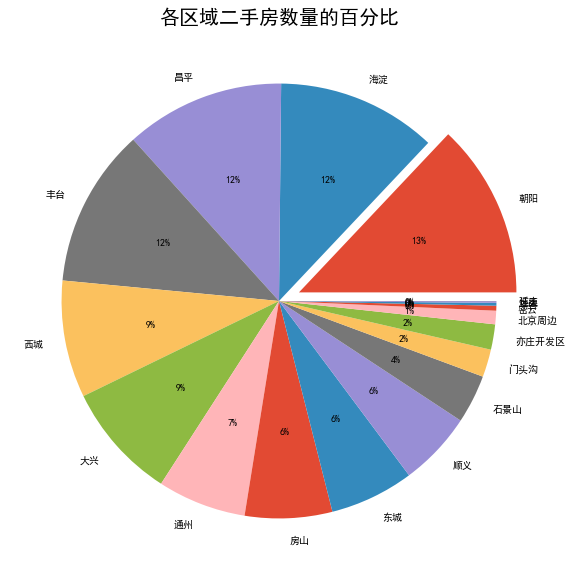

In [5]:
def auto_x(bar, x_index):
    x = []
    for i in bar: 
        x.append(i.get_x() + i.get_width()/2)
    x = tuple(x)
    plt.xticks(x, x_index)
# 各区域二手房平均价格对比 # plt.rc('font', family='SimHei', size=13) plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.rc('font', family='SimHei', size=13) 
plt.style.use('ggplot')

plt.subplot(211)
plt.title('各区域二手房平均价格的对比', fontsize = 20)
plt.ylabel('二手房平均价格 (万/平方米)', fontsize = 15)
bar1 = plt.bar(df_house_mean.index,  df_house_mean.values, color='c')

#auto_x(bar1, df_house_mean.index)

plt.show()
# 各区域二手房数量对比
plt.figure(figsize=(20,10))
plt.subplot(212)
plt.title('各区域二手房平均数量的对比', fontsize = 20)
plt.ylabel('二手房数量', fontsize = 15)
bar1 = plt.bar(df_house_count.index,  df_house_count.values, color='c')

#auto_x(bar1, df_house_mean.index)

plt.show()
# 各区域二手房数量百分比
plt.figure(figsize=(10,10))
plt.title('各区域二手房数量的百分比', fontsize=20)
ex = [0]*len(df_house_count)
ex[0] = 0.1
print(ex)
plt.pie(df_house_count, radius=1, autopct='%1.f%%', labels = df_house_count.index, explode=ex )

plt.show()

## 房价和房屋面积区段的二手房数量统计

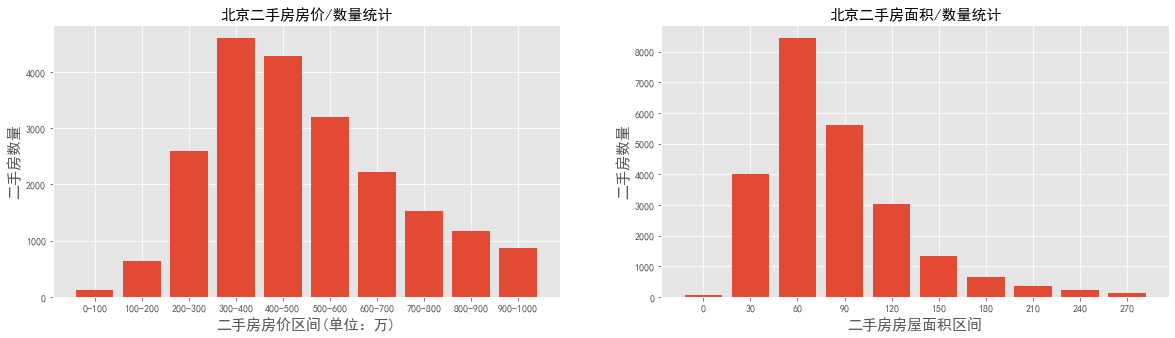

In [6]:
# 获取二手房总价的范围
def get_price_range(price, base=100):
    return '{0}-{1}'.format(int(price//base)*base, int(price//base)*base+base)

# 获取二手房面积的范围
def get_size_range(size, base=30):
    return '{0}-{1}'.format(int(size//base)*base, int(size//base)*base+base)

# 筛选房屋总价小于1000万的二手房信息进行统计 \d+表示一到多个数字
df['GroupPrice'] = df['Price'].apply(get_price_range)
df['GroupPriceSplit'] = df['GroupPrice'].str.extract('(\d+)-\d+', expand=False)
df['GroupPriceSplit'] = df['GroupPriceSplit'].astype('int')

sort_by_price_range = df.loc[df['GroupPriceSplit']<1000, ['GroupPrice','Price','GroupPriceSplit']] 
sort_by_price_range.set_index('GroupPrice', inplace=True) 
sort_by_price_range.sort_values(by='GroupPriceSplit', inplace=True) 

# 筛选房屋面积小于300万的二手房信息进行统计
df['GroupSize'] = df['Size'].apply(get_size_range)
df['GroupSizeSplit'] = df['GroupSize'].str.extract('(\d+)-\d+', expand=False)
df['GroupSizeSplit'] = df['GroupSizeSplit'].astype('int')
sort_by_size_range = df.loc[df['GroupSizeSplit']<300, ['GroupSize','Size','GroupSizeSplit']] 
sort_by_size_range.set_index('GroupSize', inplace=True)
sort_by_size_range.sort_values(by='GroupSizeSplit', inplace=True)
# display(sort_by_size_range)


# 对房价和房屋面积分组
df_group_price = sort_by_price_range.groupby('GroupPrice')['Price'].count()
df_group_size = sort_by_size_range.groupby('GroupSizeSplit')['Size'].count()
    
# 房价范围 vs 房屋数量可视化分析
fig_group_pirce = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title(u'北京二手房房价/数量统计', fontsize=15)
plt.xlabel(u'二手房房价区间(单位：万)', fontsize=15)
plt.ylabel(u'二手房数量', fontsize=15)
rect_group_price = plt.bar(np.arange(len(df_group_price.index)), df_group_price.values)
auto_x(rect_group_price, df_group_price.index) 

plt.subplot(122)
plt.title(u'北京二手房面积/数量统计', fontsize=15)
plt.xlabel(u'二手房房屋面积区间', fontsize=15)
plt.ylabel(u'二手房数量', fontsize=15)
rect_group_size = plt.bar(np.arange(len(df_group_size.index)), df_group_size.values)
auto_x(rect_group_size, df_group_size.index) 

plt.show()

## 西城 & 海淀 各地方二手房房价对比

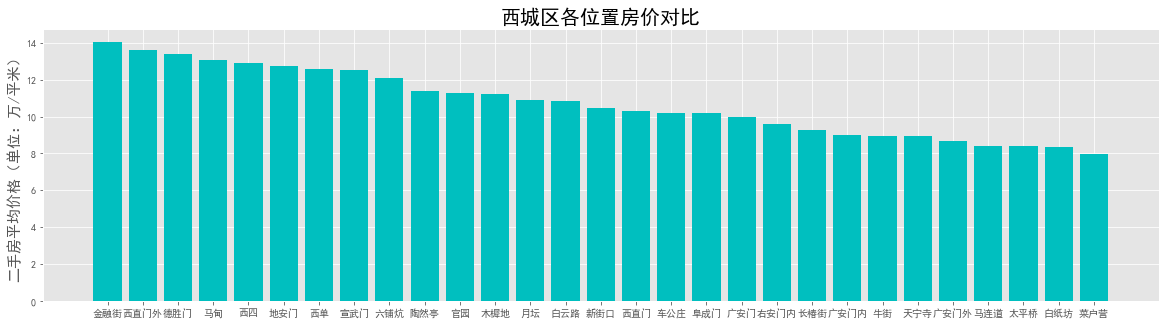

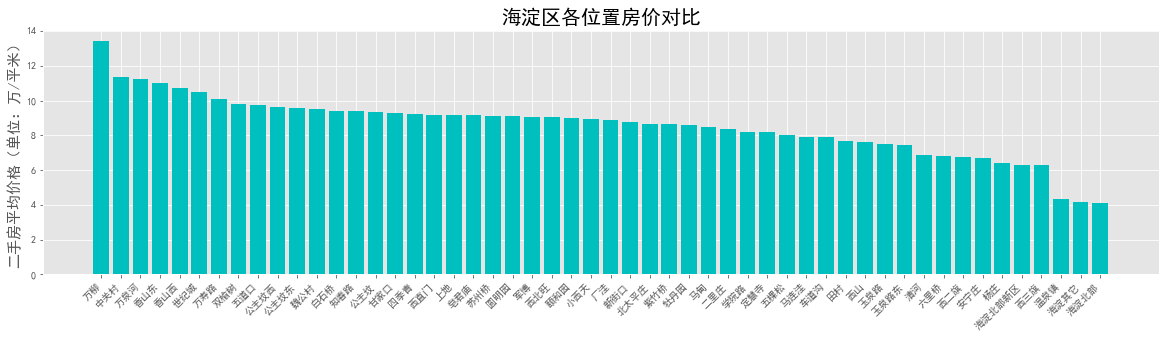

In [7]:
# 筛选区域为西城和海淀的数据
df_xicheng = df.loc[df['Region']=='西城']
df_haidian = df.loc[df['Region']=='海淀'] 

# 西城区各位置房价对比
fig1 = plt.figure(figsize=(20,5))
df_xicheng = df_xicheng.groupby('District')['PriceMs'].mean().sort_values(ascending=False)
rect3 = plt.bar(np.arange(len(df_xicheng.index)), df_xicheng.values, color='c')
plt.title(u'西城区各位置房价对比', fontsize=20)
plt.ylabel(u'二手房平均价格（单位：万/平米）', fontsize=15)
auto_x(rect3, df_xicheng.index) 

# 海淀区各位置房价对比
fig2 = plt.figure(figsize=(20,5))
df_haidian = df_haidian.groupby('District')['PriceMs'].mean().sort_values(ascending=False)
rect4 = plt.bar(np.arange(len(df_haidian.index)), df_haidian.values, color='c')
plt.title(u'海淀区各位置房价对比', fontsize=20)
plt.ylabel(u'二手房平均价格（单位：万/平米）', fontsize=15)
auto_x(rect4, df_haidian.index) 
fig2.autofmt_xdate(rotation=45)

plt.show()